#### Задание 5.1.

Для трех значений порога 70 + №, где № – номер по списку группы (7), провести пороговую обработку полутонового изображения с плавным изменением интенсивности.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    # Show the image
    plt.imshow(image)
    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])
    plt.show()

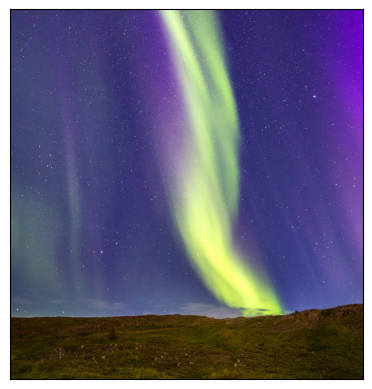

In [2]:
img = cv2.imread ('pictures/light_sky.jpg')
imgshow(img)
img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)

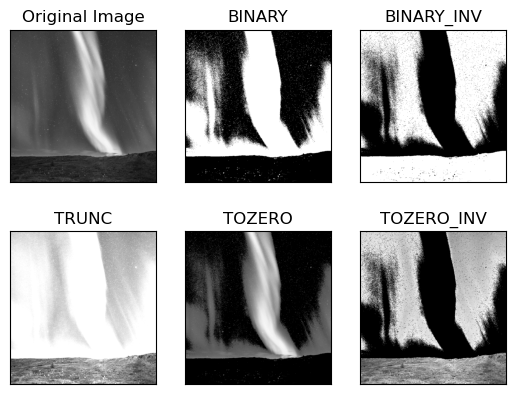

In [3]:
ret, thresh1 = cv2.threshold(img, 70+7,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 70+7,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 70+7,255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img, 70+7,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 70+7,255, cv2.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

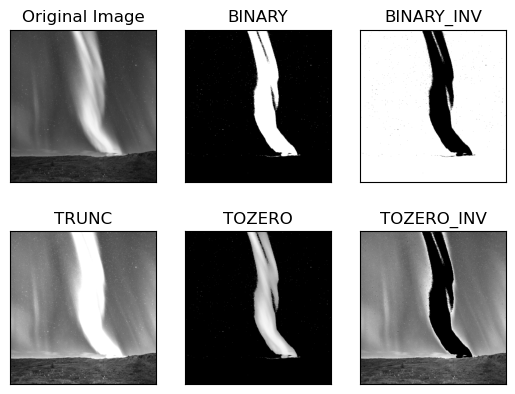

In [4]:
ret, thresh1 = cv2.threshold(img, 140+7,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 140+7,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 140+7,255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img, 140+7,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 140+7,255, cv2.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

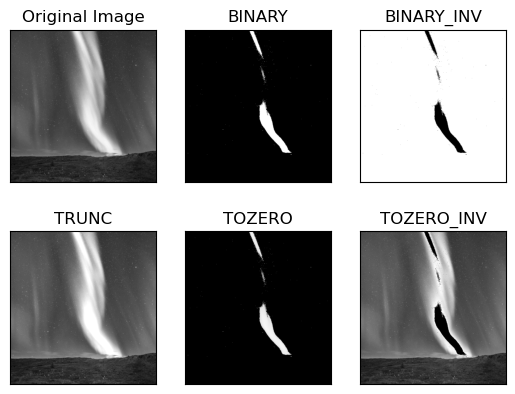

In [5]:
ret, thresh1 = cv2.threshold(img, 210+7,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 210+7,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 210+7,255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img, 210+7,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 210+7,255, cv2.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Задание 5.2.

Протестировать функции с адаптивным порогом, задавая последовательно два значения порога, примерно 1/3 и 2/3 от максимума интенсивности. Проанализировать результат пороговой обработки изображения

In [6]:
img = cv2.imread('pictures/light_sky.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)

In [7]:
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

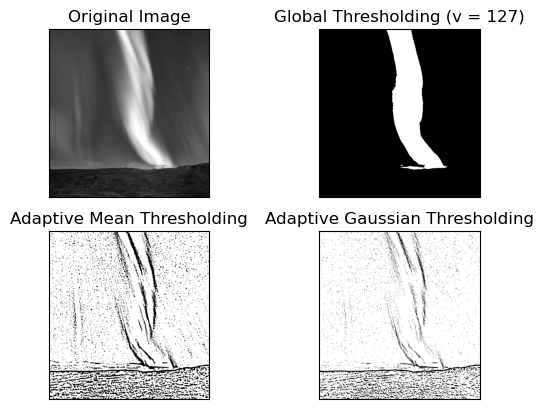

In [8]:
titles = ['Original Image', 'Global Thresholding (v = 127)', 
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Задание 5.3. 
Загрузить модули cv2, random, PIL. Создать зашумленное изображение.

In [9]:
import random
from PIL import Image, ImageDraw
image = Image.open('pictures/light_sky.jpg')
draw = ImageDraw.Draw(image) 

In [10]:
import random
from PIL import Image, ImageDraw
image = Image.open('pictures/light_sky.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()  

In [11]:
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 200)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

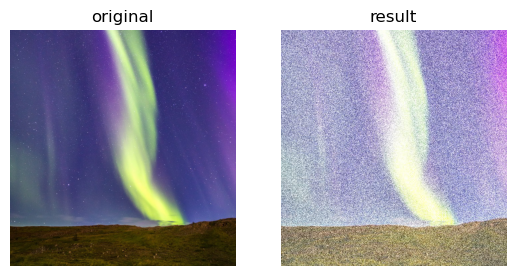

In [12]:
image.save("median.png", "JPEG")

imag = cv2.imread('pictures/light_sky.jpg')
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
img = cv2.imread('median.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imag),plt.title('original')
plt.axis("off")
plt.subplot(122),plt.imshow(img),plt.title('result')
plt.axis("off")
plt.show()

#### Задание 5.4.

На вход программы пороговой обработки подается зашумленное изображение. Это изображение обрабатывается тремя способами. В первом случае используется глобальный порог со значением 127. Во втором случае напрямую применяется порог Оцу. В третьем случае изображение сначала удаляет шум фильтром с гауссовым ядром 5x5, затем применяется пороговая обработка Оцу. Сделать анализ того, как фильтрация шума улучшает результат.

In [13]:
img = cv2.imread('pictures/light_sky.jpg', 0)
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [14]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ["Original Noisy Image","Histogram","GlobalThresholding (v=127)",
          "Original Noisy Image", "Histogram","Otsu’s Thresholding",
          "Gaussian filtered Image","Histogram","Otsu’s Thresh-olding"]

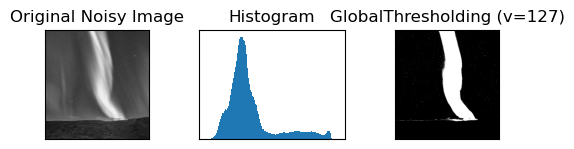

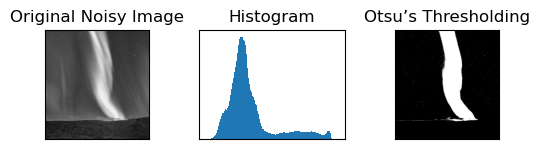

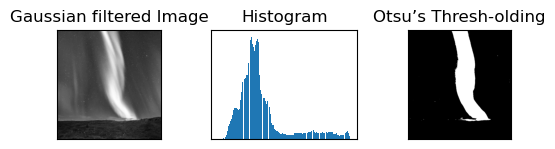

In [15]:
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3], "gray")
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],"gray")
    plt.title(titles[i*3+2]), plt.xticks([]),plt.yticks([])
    plt.show()